# Final Project 

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [1]:
%autosave 10
# Autosaving every ten seconds.

Autosaving every 10 seconds


## Import libraries

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
# Print all the interactive output without resorting to print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
## Hide the warning boxes
import warnings
warnings.filterwarnings('ignore')

## Set options

In [5]:
## Display more information 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

## Read datasets

In [6]:
## Instantiate data frame from data #######################

movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basics_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
# I am not loading movie_info_df because I found movies_df which has more movies.
# imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv(
    'zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
# I am not loading movie_info_df because I decided to not use the unique info (synopsis) from this table in my project
# movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')
# I am not loading reviews_df because I decided to not use the unique info (review) from this table in my project
# reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', encoding= 'unicode_escape', delimiter = '\t')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
money_df = pd.read_csv('zippedData/money.csv')
movies_df = pd.read_csv('zippedData/movies.csv')

## EDA for all datasets
 There are 11 datasets given in the project and 2 datasets from the web. Exploratory data analysis was done in all data sets to gain a certain amount of familiarity with the data, before one starts to extract insights from it.There is enormous missing data in most of the data sets. The datasets found from the web has less missing data.

### Display the first 5 rows of data frames

In [7]:
movies_df.head()

,tconst,primaryTitle,startYear,genres
0,tt0000009,Miss Jerry,1894,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
2,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
3,tt0000502,Bohemios,1905,\N
4,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"


In [8]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
money_df.head()

,imdb_id,title,year,director,production_co,region_code,rank,budget_usd,us_gross
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,[US],519,$245MM,$937MM
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,[US],111,$356MM,$858MM
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,[US],533,$237MM,$761MM
3,tt1825683,Black Panther,2018,Ryan Coogler,Marvel Studios,[US],269,$200MM,$700MM
4,tt4154756,Avengers: Infinity War,2018,Anthony Russo,Marvel Studios,[US],376,$321MM,$679MM


### Check shapes and info

In [11]:
## Check shapes ##     #################
print(f'Shape of movie_gross_df is {movie_gross_df.shape}')
print(f'Shape of imdb_name_basics_df is {imdb_name_basics_df.shape}')
print(f'Shape of imdb_title_akas is {imdb_title_akas_df.shape}')
print(f'Shape of imdb_title_crew_df is {imdb_title_crew_df.shape}')
print(f'Shape of imdb_title_principals_df is {imdb_title_principals_df.shape}')
print(f'Shape of imdb_title_ratings_df is {imdb_title_ratings_df.shape}')
print(f'Shape of tmdb_movies_df is {tmdb_movies_df.shape}')
print(f'Shape of movie_budgets_df is {movie_budgets_df.shape}')
print(f'Shape of money_df is {money_df.shape}')
print(f'Shape of movies_df is {movies_df.shape}')


Shape of movie_gross_df is (3387, 5)
Shape of imdb_name_basics_df is (606648, 6)
Shape of imdb_title_akas is (331703, 8)
Shape of imdb_title_crew_df is (146144, 3)
Shape of imdb_title_principals_df is (1028186, 6)
Shape of imdb_title_ratings_df is (73856, 3)
Shape of tmdb_movies_df is (26517, 10)
Shape of movie_budgets_df is (5782, 6)
Shape of money_df is (14702, 9)
Shape of movies_df is (545821, 4)


In [12]:
## Check info ##
print('----------------movie_gross_df--------------------')
movie_gross_df.info()
print('----------------imdb_name_basics_df--------------------')
imdb_name_basics_df.info()
print('----------------imdb_title_akas_df--------------------')
imdb_title_akas_df.info()
print('----------------imdb_title_crew_df-------------------')
imdb_title_crew_df.info()
print('----------------imdb_title_principals_df--------------------')
imdb_title_principals_df.info()
print('----------------imdb_title_ratings_df--------------------')
imdb_title_ratings_df.info()
print('----------------tmdb_movies_df--------------------')
tmdb_movies_df.info() 
print('----------------movie_budgets_df--------------------')
movie_budgets_df.info()
print('----------------movies_df--------------------')
movies_df.info()
print('----------------money_df--------------------')

----------------movie_gross_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
----------------imdb_name_basics_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
----------------imdb_title_akas_df--------------------
<class 'pandas.core.frame.DataFrame'>
Ran

### Check invalid values


In [13]:
## Check invalid (nan) values ##
movies_df.isna().sum()
movie_gross_df.isna().sum()
movie_budgets_df.isna().sum()
money_df.isna().sum()

tconst          0
primaryTitle    0
startYear       0
genres          0
dtype: int64

title             0   
studio            5   
domestic_gross    28  
foreign_gross     1350
year              0   
dtype: int64

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

imdb_id          2   
title            2   
year             17  
director         31  
production_co    357 
region_code      1255
rank             14  
budget_usd       6706
us_gross         104 
dtype: int64

## Data cleaning for movie_gross_df

After EDA it is explored that foreign_gross column has too many missing values. To keep the data as much as possible the dataframe is processed by seperating it into two dataframes. 

In [14]:
# Define two dataframes from movie_gross_df
domestic_gross_df = movie_gross_df.dropna(subset=['studio', 'domestic_gross'])
total_gross_df = movie_gross_df.dropna()

In [15]:
## There is a problematic row in freign_gross column. This is a for loop to find it.

# [float(a) for a in movie_gross_df['foreign_gross']]
# for i, row in movie_gross_df.iterrows():
#     if not isinstance(row['foreign_gross'], str):
#         print(i, row['foreign_gross'])

In [16]:
## The row found by the for loop
# total_gross_df[total_gross_df['foreign_gross'] == "1,131.6"]

In [17]:
# total_gross_df[total_gross_df['foreign_gross'] == "1,131.6"].index

In [18]:
# Replace , . $ from the string to change type to integer.
total_gross_df['foreign_gross'] = total_gross_df['foreign_gross'].apply(
    lambda x: x.replace(',', ''))
total_gross_df['foreign_gross'] = total_gross_df['foreign_gross'].apply(
    lambda x: x.replace('.', ''))

In [19]:
# Change the type from string to float.
total_gross_df['foreign_gross'] = total_gross_df['foreign_gross'].astype(float)

In [20]:
# Make a new column with two columns of the data frame.
sum_column = total_gross_df['foreign_gross'] + total_gross_df['domestic_gross']
total_gross_df["total_gross"] = sum_column

In [21]:
# Sort the values of the new column in descending order.
total_gross_df = total_gross_df.sort_values(by='total_gross', ascending=False)

In [22]:
# Group the total gross data frame by studio,  find the mean of grouped values, sort groups in descending order.
grouped_total_gross_df = total_gross_df.groupby(
    'studio', as_index=False).mean().sort_values(by='total_gross', ascending=False)

In [23]:
# Filter the values to make a better plot.
filtered_grouped_total_gross_df = grouped_total_gross_df[
    grouped_total_gross_df['total_gross'] > 5e7]

In [24]:
# Group the domestic gross data frame by studio,  find the mean of grouped values, sort groups in descending order.
grouped_domestic_gross_df = domestic_gross_df.groupby(
    'studio', as_index=False).mean().sort_values(by='domestic_gross', ascending=False)

In [25]:
# Filter the values to make a better plot.
filtered_grouped_domestic_gross_df = grouped_domestic_gross_df[
    grouped_domestic_gross_df['domestic_gross'] > 1e7]

In [26]:
# Filter the values to make a better plot.
total_gross_df = total_gross_df[:800]

## Plot the high profit studios


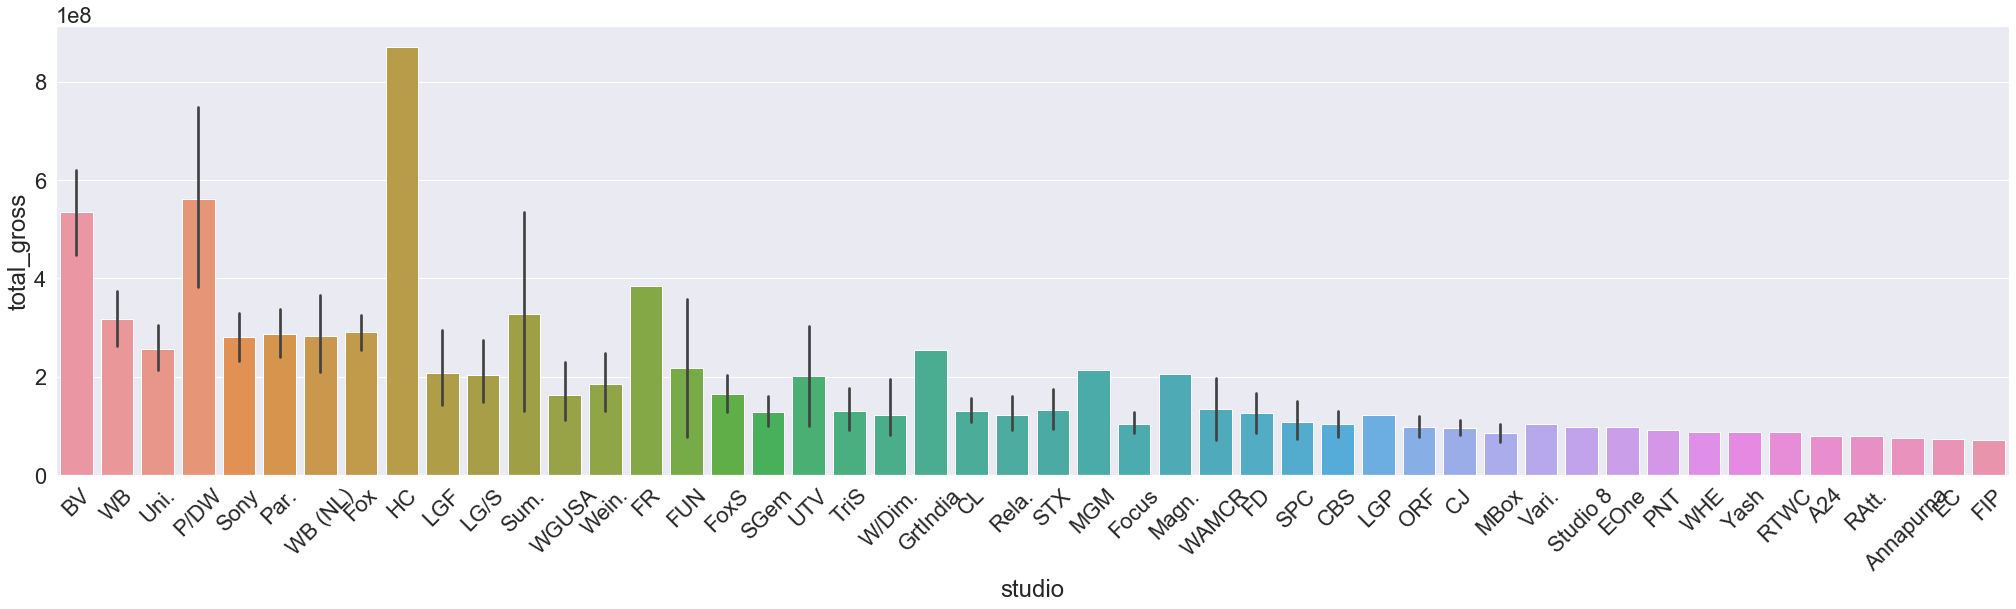

In [27]:
# Bar graph of high profit studios (domestic gross + foreign gross)
# Set font scale and figsize
sns.set(rc={'figure.figsize': (35, 8.27)}, font_scale=2)
g = sns.barplot(x="studio", y="total_gross", data=total_gross_df)
for item in g.get_xticklabels():
    item.set_rotation(45)

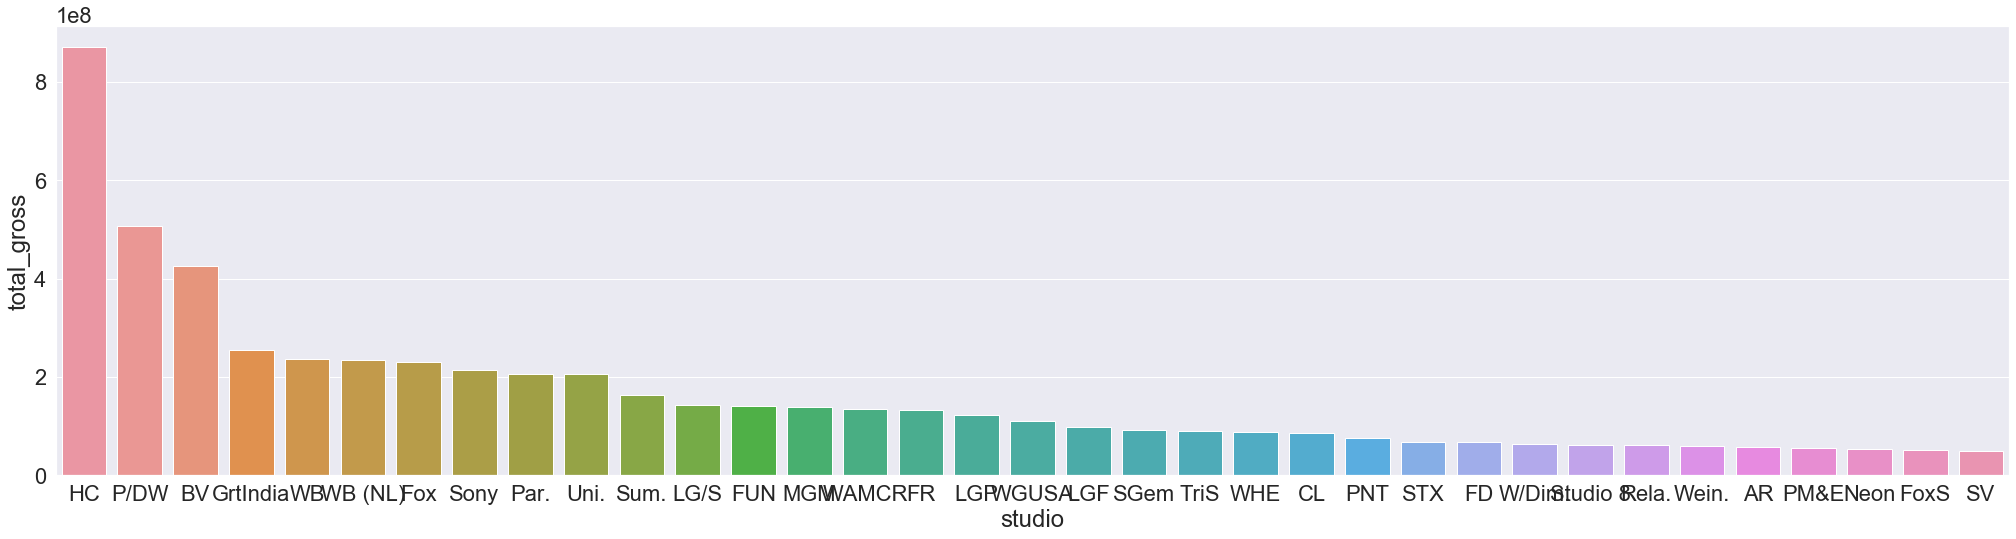

In [28]:
# Bar graph of high profit studios (domestic gross + foreign gross)
# Set font scale and figsize
sns.set(rc={'figure.figsize': (35, 8.27)}, font_scale=2)
sns.barplot(x="studio", y="domestic_gross",
            data=filtered_grouped_domestic_gross_df)
sns.barplot(x="studio", y="total_gross", data=filtered_grouped_total_gross_df)
for item in g.get_xticklabels():     ## Rotate x labels to 45 degrees angle
    item.set_rotation(45)

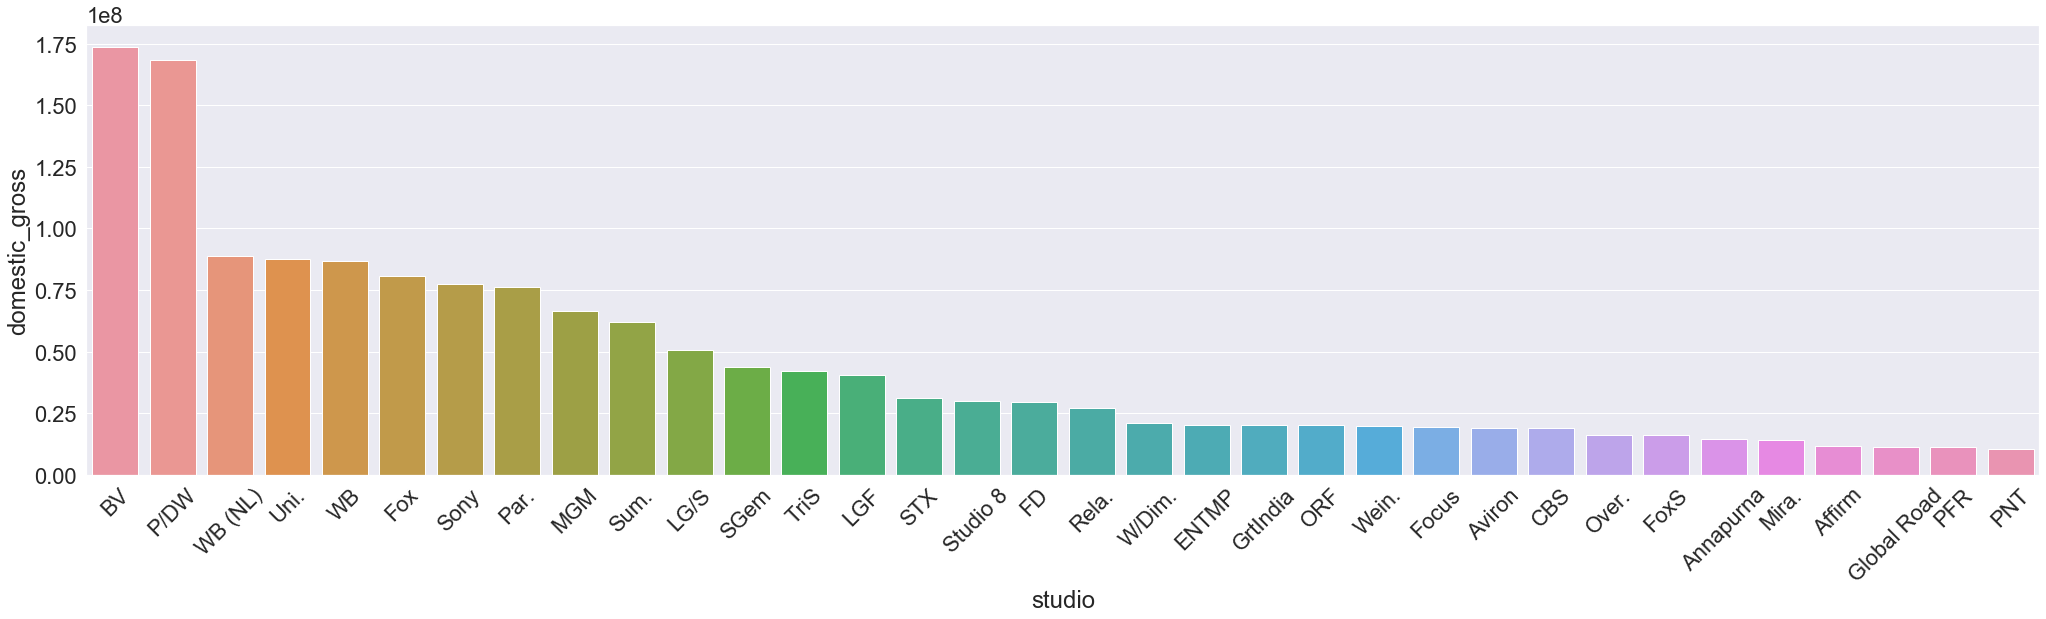

In [29]:
# Bar graph of high profit studios (domestic gross)
sns.set(rc={'figure.figsize': (35, 8.27)})
sns.set(font_scale=2)  # Set font scale
g = sns.barplot(x="studio", y="domestic_gross",
                data=filtered_grouped_domestic_gross_df)
for item in g.get_xticklabels():  # Rotate x labels to 45 degrees angle
    item.set_rotation(45)

## Data cleaning for movies_df

In [30]:
# Movies data frame does not contain null values.
movies_df['tconst'].isna().sum()
movies_df['primaryTitle'].isna().sum()
movies_df['startYear'].isna().sum()
movies_df['genres'].isna().sum()

0

0

0

0

In [31]:
# movies_df[movies_df.genres != '\N']

In [32]:
movies_df = movies_df.drop_duplicates(
    subset='tconst', keep='first')  # Drop duplicates

## Data cleaning for movie_budgets_df

In [33]:
movie_budgets_df.isna().sum()
## There is no need to drop columns.

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [34]:
len(movie_budgets_df)

5782

In [35]:
movie_budgets_df = movie_budgets_df.drop_duplicates(
    subset=["release_date", "movie"], keep="first")

### Merging two dataframes

In [36]:
# Change column names to prepare merge.
movies_df = movies_df.rename(columns={'primaryTitle': 'movie'})

In [37]:
# Merge two data frames on movie column.
movie_budgets_df = pd.merge(
    movie_budgets_df, movies_df, how='inner', on='movie')

In [38]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,startYear,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt0154182,1941,Drama
1,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt0278325,1916,Drama
2,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt0499549,2009,"Action,Adventure,Fantasy"
3,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,2011,Horror
4,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,2011,"Action,Adventure,Fantasy"


### Exploding genres column

In [39]:
# Seperate the genres column to many columns to plot categorically.
movie_budgets_df["genres"] = movie_budgets_df["genres"].str.split(",", 3)

In [40]:
# Making new columns with all elements of genres column.
movie_budgets_df = movie_budgets_df.explode('genres')

### More cleaning and preparing

In [41]:
# Reset the index and dropping the previous index column
movie_budgets_df = movie_budgets_df.reset_index()
movie_budgets_df = movie_budgets_df.drop(columns=['index'])

In [42]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace('.', ''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace('$', ''))

In [43]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace('.', ''))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace('$', ''))

In [44]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace('.', ''))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace('$', ''))

In [46]:
# Change the type from string to integer.
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(
    int)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(
    int)
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(
    int)

In [49]:
# Make a new column with two columns of the data frame.
profit = movie_budgets_df['worldwide_gross'] + movie_budgets_df['production_budget']
movie_budgets_df["profit"] = profit

In [50]:
# Sort the values of worldwide gross column in descending order.
movie_budgets_df = movie_budgets_df.sort_values(
    by='profit', ascending=False)

In [51]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,startYear,genres,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt0154182,1941,Drama,3201345279
2,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt0499549,2009,Action,3201345279
3,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt0499549,2009,Adventure,3201345279
4,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt0499549,2009,Fantasy,3201345279
5,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,2011,Horror,3201345279


## Plot the genres of movies

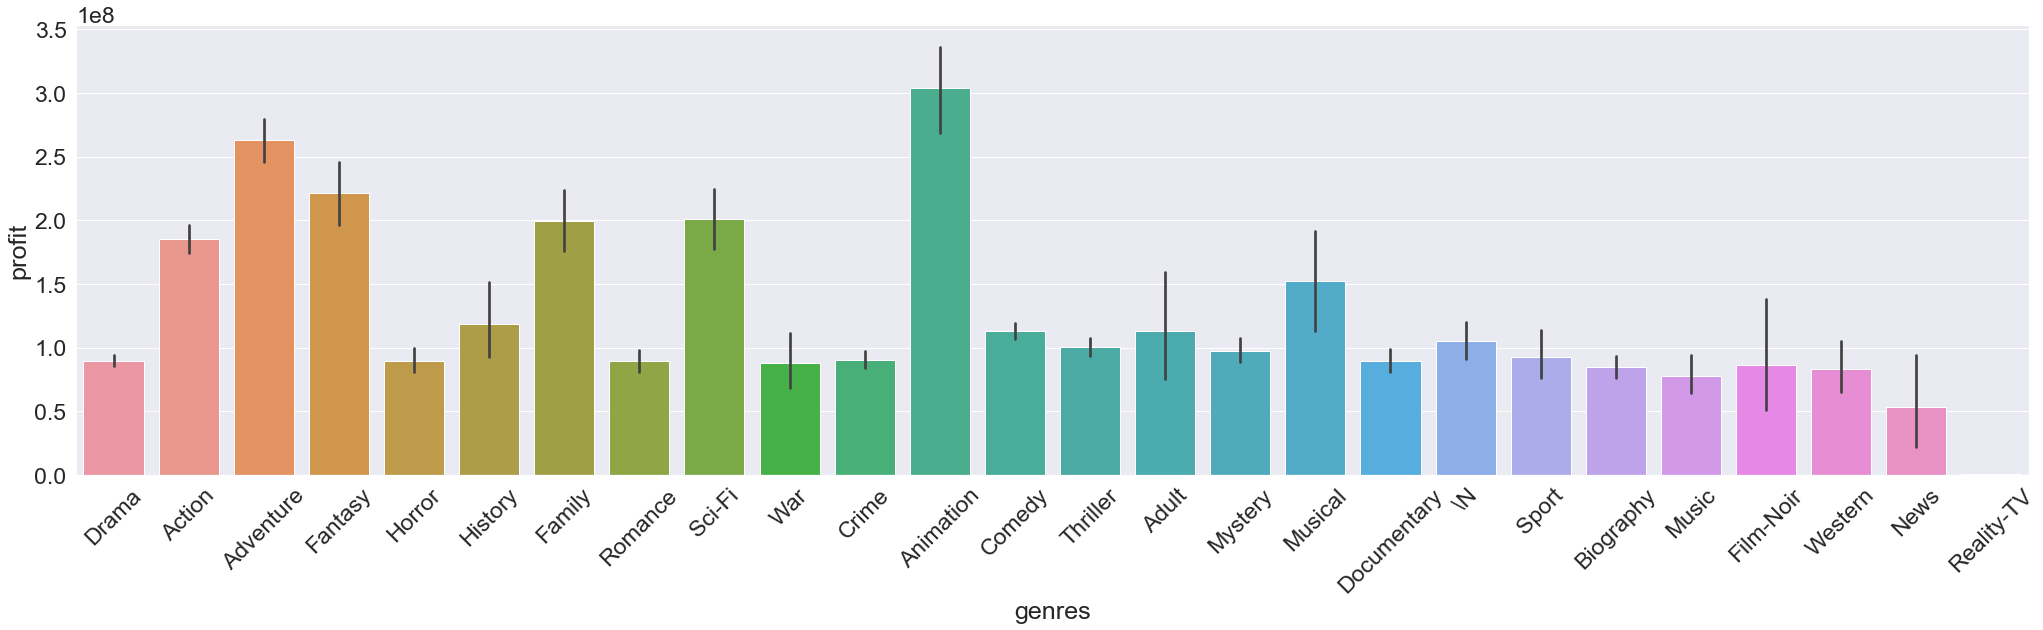

In [52]:
sns.set(font_scale=2.1)  # Set font scale
g = sns.barplot(x="genres", y="profit", data=movie_budgets_df)
for item in g.get_xticklabels():  # Rotate x labels to 45 degrees angle
    item.set_rotation(45)

## Data cleaning and preparing

In [ ]:
# Get the original dataset again to use in another plot
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_budgets_df.head()

In [ ]:
# Replace , . $ from the string to change type to integer.
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.strip('$'))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.strip('$'))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(
    lambda x: x.replace(',', ''))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.strip('$'))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(
    lambda x: x.replace(',', ''))

In [ ]:
# Change the type from string to float.
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(
    float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(
    float)
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(
    float)

In [ ]:
# Get the release month from the release by slicing.
movie_budgets_df['release_month'] = [a[0:3]
                                     for a in movie_budgets_df['release_date']]

## Plot the budget and gross

In [ ]:
sns.set(font_scale=3)  # Set font scale
sns.lmplot(x="production_budget", y="worldwide_gross", hue='release_month',
           data=movie_budgets_df, height=14, aspect=1.1, scatter_kws={'alpha': 1, "s": 300}, line_kws={'lw': 7})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])  # set the x- and y-limits of plot.

In [ ]:
sns.set(font_scale=3)  # Set font scale
sns.lmplot(x="production_budget", y="domestic_gross", hue='release_month',
           data=movie_budgets_df, height=14, aspect=1.1, scatter_kws={'alpha': 1, "s": 300}, line_kws={'lw': 7})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])  # set the x- and y-limits of plot.

## Data cleaning for money_df

In [127]:
money_df = pd.read_csv('zippedData/money.csv')

In [107]:
len(money_df)

14702

In [108]:
money_df.head()

,imdb_id,title,year,director,production_co,region_code,rank,budget_usd,us_gross
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,[US],519,$245MM,$937MM
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,[US],111,$356MM,$858MM
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,[US],533,$237MM,$761MM
3,tt1825683,Black Panther,2018,Ryan Coogler,Marvel Studios,[US],269,$200MM,$700MM
4,tt4154756,Avengers: Infinity War,2018,Anthony Russo,Marvel Studios,[US],376,$321MM,$679MM


In [128]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14702 entries, 0 to 14701
Data columns (total 9 columns):
imdb_id          14700 non-null object
title            14700 non-null object
year             14685 non-null object
director         14671 non-null object
production_co    14345 non-null object
region_code      13447 non-null object
rank             14688 non-null object
budget_usd       7996 non-null object
us_gross         14598 non-null object
dtypes: object(9)
memory usage: 1.0+ MB


In [129]:
money_df = money_df.drop_duplicates(
    subset='imdb_id', keep='first')  # Drop duplicates

In [111]:
len(money_df)

14561

In [130]:
money_df = money_df.dropna(subset=['year', 'director','budget_usd','us_gross'])

In [131]:
len(money_df)

7897

In [114]:
# money_df['year'][10470] = '2010'
# money_df['year'][11092] = '2013'
# money_df['year'][12981] = '1972'

In [132]:
money_df['year'] = money_df['year'].apply(lambda x: x.replace('–', ''))

In [133]:
money_df['year']= money_df['year'].astype(int)

In [134]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 0 to 14598
Data columns (total 9 columns):
imdb_id          7897 non-null object
title            7897 non-null object
year             7897 non-null int64
director         7897 non-null object
production_co    7861 non-null object
region_code      7468 non-null object
rank             7897 non-null object
budget_usd       7897 non-null object
us_gross         7897 non-null object
dtypes: int64(1), object(8)
memory usage: 617.0+ KB


In [119]:
money_df.head()

,imdb_id,title,year,director,production_co,region_code,rank,budget_usd,us_gross
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,[US],519,$245MM,$937MM
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,[US],111,$356MM,$858MM
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,[US],533,$237MM,$761MM
3,tt1825683,Black Panther,2018,Ryan Coogler,Marvel Studios,[US],269,$200MM,$700MM
4,tt4154756,Avengers: Infinity War,2018,Anthony Russo,Marvel Studios,[US],376,$321MM,$679MM


In [120]:
money_df.tail()

,imdb_id,title,year,director,production_co,region_code,rank,budget_usd,us_gross
14583,tt0832347,Falling,2006,Barbara Albert,Coop99 Filmproduktion,[AT],"209,298",€2MM,$509
14590,tt3290872,Skinless,2013,Dustin Mills,NaN,NaN,"174,224",$2K,$400
14594,tt1682940,Playback,2012,Michael A. Nickles,Fontenay Films Ltd.,[IE],"45,045",$1.6MM,$264
14596,tt1934452,Realms,2017,Daric Gates,DNF Pictures,[US],"17,728",$2MM,$147
14598,tt0429277,Zyzzyx Rd,2006,John Penney,Zyzzyx LLC,[US],"14,918",$2MM,$30


In [135]:
money_df = money_df[money_df['year'] >= 2000]

In [136]:
len(money_df)

5162

In [137]:
money_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5162 entries, 0 to 14598
Data columns (total 9 columns):
imdb_id          5162 non-null object
title            5162 non-null object
year             5162 non-null int64
director         5162 non-null object
production_co    5135 non-null object
region_code      5065 non-null object
rank             5162 non-null object
budget_usd       5162 non-null object
us_gross         5162 non-null object
dtypes: int64(1), object(8)
memory usage: 403.3+ KB


In [138]:
money_df['budget_usd'] = money_df['budget_usd'].apply(lambda x: x.strip('MM'))
money_df['budget_usd'] = money_df['budget_usd'].apply(lambda x: x.strip('K'))
money_df['year'] = money_df['year'].apply(lambda x: x.replace('$', ''))
money_df['year'] = money_df['year'].apply(lambda x: x.replace('€', ''))
money_df['year'] = money_df['year'].apply(lambda x: x.replace('£', ''))
4192     INR 7  
4392     INR 700 
4440     THB 200 
4480     FRF 160 
4572     CNY 100 
4941     CAD 6 
5293     FRF 95 
5320     INR 1.25B 
5323     INR 550   
5387     CAD 5  
5670     INR 1  
5689     JPY 370 
5726     INR 1.25B 
5805     CAD 4 
5805     CAD 4 
5934     INR 450 
5948     INR 5.42B
6027     CAD 5.5 
6055     CAD 2 
6145     CAD 5
6185     INR 400
6247     INR 700 
6273     FRF 100 
6301     FRF 327  
6304     INR 550
6394     INR 3.5B
6429     INR 300
6438     XN 48 
6448     INR 500 
6454     INR 1.5B
6491     INR 350
6544     INR 450 
6588     INR 200
6654     INR 350



In [141]:
[float(a) for a in money_df['budget_usd']]
for i, row in money_df.iterrows():
    if not isinstance(row['budget_usd'], str):
        print(i, row['budget_usd'])

ValueError: could not convert string to float: '$245'

In [123]:
# Bar graph of directors of high profit movies
# Set font scale and figsize
sns.set(rc={'figure.figsize': (35, 8.27)}, font_scale=2)
p = sns.barplot(x="director", y="us_gross", data=money_df)
for item in p.get_xticklabels():
    item.set_rotation(45)

ValueError: Neither the `x` nor `y` variable appears to be numeric.